In [1]:
import numpy as np
import pandas as pd
import dask.bag as db
import matplotlib.pyplot as plt
import dask.dataframe as dd
import dask.array as da
from dask.distributed import Client, progress
import time

In [ ]:
#pandas for task a
trips = pd.read_csv("Trips_by_Distance.csv")
trips['Date'] = pd.to_datetime(trips['Date'])
#sort by date, not needed
trips = trips.sort_values(by='Date', ascending=True)

#remove unneccessary columns
trips = trips.drop(columns=["State FIPS", "State Postal Code", "County FIPS", "County Name"])
#this will leave null values, remove them as well
# trips.dropna(inplace=True)

#Look for data in the national level only
trips__national = trips[trips["Level"] == "National"]
national_mean_home_pop = trips__national.groupby(by='Week')['Population Staying at Home'].mean()


plt.figure(figsize = (17, 10))
national_mean_home_pop.plot(kind='bar', color='skyblue')


plt.title('National Mean Population Staying at Home by Week')
plt.xlabel('Week')
plt.ylabel('Mean Population Staying at Home')
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [ ]:
#for defining dtypes
#https://docs.dask.org/en/stable/generated/dask.dataframe.read_csv.html


In [ ]:
Notes:
#When you use computer, it converts your dataframe to panda

In [ ]:
trips_dtype = {
    'Number of Trips': 'float64',
    'Number of Trips <1': 'float64',
    'Number of Trips 1-3': 'float64',
    'Number of Trips 3-5': 'float64',
    'Number of Trips 5-10': 'float64',
    'Number of Trips 10-25': 'float64',
    'Number of Trips 25-50': 'float64',
    'Number of Trips 50-100': 'float64',
    'Number of Trips 100-250': 'float64',
    'Number of Trips 250-500': 'float64',
    'Number of Trips >=500': 'float64',
    'State FIPS': 'object',
    'State Postal Code': 'object',
    'County FIPS': 'object',
    'County Name': 'object',
    'Population Staying at Home': 'float64',
    'Population Not Staying at Home': 'float64'
}

trips = dd.read_csv("Trips_by_Distance.csv",dtype = trips_dtype)
# trips_full = dd.read_csv("Trips_Full Data.csv")

In [ ]:
trips['Date'] = dd.to_datetime(trips['Date'])
trips = trips.drop(columns=["State FIPS", "State Postal Code", "County FIPS", "County Name"])

In [ ]:
null_counts = trips.isna().sum().compute()
print(null_counts)

In [ ]:
trips.dropna(how='any')

In [ ]:
trips.isnull().any()

In [ ]:


trips2 = trips.dropna(subset=trips.columns[:10])

In [ ]:
trips2 = trips.dropna(how='any')

In [ ]:
trips['Date'] = dd.to_datetime(trips['Date'])
trips

In [ ]:
trips_filtered = trips.drop(columns=["State FIPS", "State Postal Code", "County FIPS", "County Name"])

In [ ]:
type(trips_filtered)

In [ ]:
trips['Number of Trips 100-250'].mean().compute()

In [ ]:
from dask.distributed import Client
client = Client()
client

In [ ]:
from dask.distributed import Client, progress
n_processors = [10, 20]
n_processors_time = {}

for processor in n_processors:
    print(f"\n\n\nStarting computation with {processor} processors...\n\n\n")
    client = Client(n_workers = processor)
    start = time.time()

#-------------------------------
    get_data()
#-------------------------------

    dask_time = time.time() - start
    n_processors_time[processor] = dask_time

    print(f"\n\n\nTime with {processor} processors: {dask_time} seconds\n\n\n")
    # Close the client after computation
    client.close()
print("\n\n\n", n_processors_time, "\n\n\n")


In [ ]:
import dask
import time
from dask import delayed
from dask.distributed import Client

# Simulate a computationally heavy task
def slow_increment(x):
    time.sleep(1)  # Simulate work by sleeping for 1 second
    return x + 1

# Initialize a Dask Client to use multiprocessing
# This will use the default settings, which utilizes all available cores
client = Client(processes=True)

# List of tasks to execute in parallel using Dask delayed
tasks = [delayed(slow_increment)(i) for i in range(10)]

# Start time for parallel execution
start_time = time.time()

# Execute tasks in parallel
results = dask.compute(*tasks)
print("Results with multiprocessing:", results)

# End time for parallel execution
end_time = time.time()
print("Execution time with multiprocessing:", end_time - start_time, "seconds")

# Sequential execution for comparison
start_time_seq = time.time()
results_seq = [slow_increment(i) for i in range(10)]
end_time_seq = time.time()

print("Results with sequential execution:", results_seq)
print("Execution time with sequential execution:", end_time_seq - start_time_seq, "seconds")


In [ ]:
    trips_dtype = {
        'Number of Trips': 'float64',
        'Number of Trips <1': 'float64',
        'Number of Trips 1-3': 'float64',
        'Number of Trips 3-5': 'float64',
        'Number of Trips 5-10': 'float64',
        'Number of Trips 10-25': 'float64',
        'Number of Trips 25-50': 'float64',
        'Number of Trips 50-100': 'float64',
        'Number of Trips 100-250': 'float64',
        'Number of Trips 250-500': 'float64',
        'Number of Trips >=500': 'float64',
        'State FIPS': 'object',
        'State Postal Code': 'object',
        'County FIPS': 'object',
        'County Name': 'object',
        'Population Staying at Home': 'float64',
        'Population Not Staying at Home': 'float64'
    }

    trips = dd.read_csv("Trips_by_Distance.csv",dtype = trips_dtype)
    trips = trips.sort_values(by='Date', ascending=True)

    national = trips[trips['Level']=='National']
    state = trips[trips['Level']=='State']
    county = trips[trips['Level']=='County']

    
    state = state.drop(columns=['County FIPS','County Name'])
    county = county.drop(columns=['State FIPS','State Postal Code'])

    # Group by 'Week' and calculate the mean of 'Population Staying at Home'
population_staying_at_home_national.plot(kind='bar', figsize=(20, 7), color='skyblue')
    population_staying_at_home_state = state.groupby(by='Week')['Population Staying at Home'].mean().compute()
    population_staying_at_home_county = county.groupby(by='Week')['Population Staying at Home'].mean().compute()

    fig,(ax1, ax2,ax3) = plt.subplots(nrows=3, ncols=1, figsize=(20, 7))

    # Plot national data
    population_staying_at_home_national.plot(kind = 'bar', color='skyblue', ax=ax1)
    ax1.set_title('National Mean Population Staying at Home by Week')
    ax1.set_xlabel('Week')
    ax1.set_ylabel('Mean Population Staying at Home')
    ax1.tick_params(axis='x', rotation=90)
    ax1.grid(axis='y')

    # Plot state data
    population_staying_at_home_state.plot(kind = 'bar', color='red', ax=ax2)
    ax2.set_title('State Mean Population Staying at Home by Week')
    ax2.set_xlabel('Week')
    ax2.set_ylabel('Mean Population Staying at Home')
    ax2.tick_params(axis='x', rotation=90)
    ax2.grid(axis='y')

    # Plot county data
    population_staying_at_home_county.plot(kind = 'bar', color='green', ax=ax3)
    ax3.set_title('County Mean Population Staying at Home by Week')
    ax3.set_xlabel('Week')
    ax3.set_ylabel('Mean Population Staying at Home')
    ax3.tick_params(axis='x', rotation=90)
    ax3.grid(axis='y')

    plt.show()

In [ ]:
population_staying_at_home_national = national.groupby(by='Week')['Population Staying at Home'].mean().compute()
population_staying_at_home_state = state.groupby(by='Week')['Population Staying at Home'].mean().compute()
population_staying_at_home_county = county.groupby(by='Week')['Population Staying at Home'].mean().compute()

In [ ]:
population_staying_at_home_national = national.groupby(by='Week')['Population Staying at Home'].mean().compute()
population_staying_at_home_national.plot(kind='bar', figsize=(20, 7), color='skyblue')

In [ ]:
def get_data():
    trips_dtype = {
        'Number of Trips': 'float64',
        'Number of Trips <1': 'float64',
        'Number of Trips 1-3': 'float64',
        'Number of Trips 3-5': 'float64',
        'Number of Trips 5-10': 'float64',
        'Number of Trips 10-25': 'float64',
        'Number of Trips 25-50': 'float64',
        'Number of Trips 50-100': 'float64',
        'Number of Trips 100-250': 'float64',
        'Number of Trips 250-500': 'float64',
        'Number of Trips >=500': 'float64',
        'State FIPS': 'object',
        'State Postal Code': 'object',
        'County FIPS': 'object',
        'County Name': 'object',
        'Population Staying at Home': 'float64',
        'Population Not Staying at Home': 'float64'
    }

    trips = dd.read_csv("Trips_by_Distance.csv",dtype = trips_dtype)
    trips = trips.sort_values(by='Date', ascending=True)
    
    return trips



In [ ]:
trips = dd.read_csv("Trips_by_Distance.csv",dtype = trips_dtype)
trips = trips.repartition(npartitions=50)

In [ ]:
import os

parquet_file_path = os.path.join(os.getcwd(), "trips_par.parquet")
# Write the DataFrame to Parquet format
trips.to_parquet(parquet_file_path)

In [ ]:
%%time

pd.read_csv("Trips_by_Distance.csv")

In [ ]:
import dask.multiprocessing
# spread work across multiple cores, one worker per core
dask.config.set(scheduler='processes', num_workers = 4)  

In [ ]:
pip install calc_mean

In [ ]:
import dask.multiprocessing
dask.config.set(scheduler='processes', num_workers = 4)  

futures = []
n = 10000000
p = 10
for i in range(p):
    futures.append(dask.delayed(calc_mean)(i, n))  # add lazy task

futures
results = dask.compute(futures)  # compute all in parallel

In [ ]:
# Function that introduces a delay
def delayed_function(number):
    print(f"Processing number: {number}")
    time.sleep(1)  # Simulate some computation by sleeping for 1 second
    return number

# Start a Dask client with multiple workers
client = Client(n_workers=4)

# Measure start time
start_time = time.time()

# Use dask.delayed to wrap the function. This doesn't compute anything yet.
tasks = [dask.delayed(delayed_function)(i) for i in range(10)]

# Use dask.compute to compute all tasks in parallel
results = dask.compute(*tasks)

# Measure end time
end_time = time.time()

# Output the results
print(results)

# Print time taken
print(f"Time taken: {end_time - start_time} seconds")

# Close the client
client.close()


In [ ]:
%%time

trips_dtype = {
    'Number of Trips': 'float64',
    'Number of Trips <1': 'float64',
    'Number of Trips 1-3': 'float64',
    'Number of Trips 3-5': 'float64',
    'Number of Trips 5-10': 'float64',
    'Number of Trips 10-25': 'float64',
    'Number of Trips 25-50': 'float64',
    'Number of Trips 50-100': 'float64',
    'Number of Trips 100-250': 'float64',
    'Number of Trips 250-500': 'float64',
    'Number of Trips >=500': 'float64',
    'State FIPS': 'object',
    'State Postal Code': 'object',
    'County FIPS': 'object',
    'County Name': 'object',
    'Population Staying at Home': 'float64',
    'Population Not Staying at Home': 'float64'
}

# Read CSV with Dask
trips = dd.read_csv("Trips_by_Distance.csv", dtype = trips_dtype)

# Convert 'Date' to datetime
trips['Date'] = dd.to_datetime(trips['Date'])

# With Dask, sorting can be expensive and is often unnecessary for many operations.
# If you do need to sort, you can do so, but be aware it might be slow for large datasets.
# trips = trips.sort_values(by='Date', ascending=True)  # Potentially expensive

# Drop unnecessary columns
trips = trips.drop(columns=["State FIPS", "State Postal Code", "County FIPS", "County Name"])

# Dask handles null values fine in most aggregations, so you might not need to drop them.
# If you do want to drop NA values specifically, you'd typically do this closer to when you compute the result.

# Filter for National level data
trips_national = trips[trips["Level"] == "National"]

# Group by and calculate mean, note that this is lazy and doesn't compute yet
national_mean_home_pop = trips_national.groupby(by='Week')['Population Staying at Home'].mean()

# Dask operations are lazy, to get results you need to compute them
# Also, for plotting, convert to Pandas DataFrame
national_mean_home_pop = national_mean_home_pop.compute().to_frame().reset_index()

# Plotting with Pandas
plt.figure(figsize = (17, 10))
national_mean_home_pop.plot(kind='bar', x='Week', y='Population Staying at Home', color='skyblue', legend=None)
plt.title('National Mean Population Staying at Home by Week')
plt.xlabel('Week')
plt.ylabel('Mean Population Staying at Home')
plt.xticks(rotation=90)
plt.show()


In [ ]:
%%time

#pandas for task a
trips = pd.read_csv("Trips_by_Distance.csv")
trips['Date'] = pd.to_datetime(trips['Date'])
#sort by date, not needed
trips = trips.sort_values(by='Date', ascending=True)

#remove unneccessary columns
trips = trips.drop(columns=["State FIPS", "State Postal Code", "County FIPS", "County Name"])
#this will leave null values, remove them as well
# trips.dropna(inplace=True)

#Look for data in the national level only
trips__national = trips[trips["Level"] == "National"]
national_mean_home_pop = trips__national.groupby(by='Week')['Population Staying at Home'].mean()


plt.figure(figsize = (17, 10))
national_mean_home_pop.plot(kind='bar', color='skyblue')


plt.title('National Mean Population Staying at Home by Week')
plt.xlabel('Week')
plt.ylabel('Mean Population Staying at Home')
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [ ]:
%%time
import dask.dataframe as dd
from dask.distributed import Client
import matplotlib.pyplot as plt

# Initialize a Dask client to use 10 workers
client = Client(n_workers=10)

trips_dtype = {
    'Number of Trips': 'float64',
    'Number of Trips <1': 'float64',
    'Number of Trips 1-3': 'float64',
    'Number of Trips 3-5': 'float64',
    'Number of Trips 5-10': 'float64',
    'Number of Trips 10-25': 'float64',
    'Number of Trips 25-50': 'float64',
    'Number of Trips 50-100': 'float64',
    'Number of Trips 100-250': 'float64',
    'Number of Trips 250-500': 'float64',
    'Number of Trips >=500': 'float64',
    'State FIPS': 'object',
    'State Postal Code': 'object',
    'County FIPS': 'object',
    'County Name': 'object',
    'Population Staying at Home': 'float64',
    'Population Not Staying at Home': 'float64'
}

# Read CSV with Dask
trips = dd.read_csv("Trips_by_Distance.csv", dtype = trips_dtype)

# Convert 'Date' to datetime format (note: actual computation happens here due to compute())
trips_dd['Date'] = dd.to_datetime(trips_dd['Date'])

# Remove unnecessary columns
trips_dd = trips_dd.drop(columns=["State FIPS", "State Postal Code", "County FIPS", "County Name"])

# Filter for national level data
trips_national_dd = trips_dd[trips_dd["Level"] == "National"]

# Compute the mean population staying at home by week
# The compute() method triggers the actual computation
national_mean_home_pop_dd = trips_national_dd.groupby('Week')['Population Staying at Home'].mean().compute()

# Since plotting and some specific manipulations are more straightforward with pandas,
# convert the Dask series to pandas for plotting
national_mean_home_pop_pd = national_mean_home_pop_dd.compute()

plt.figure(figsize = (17, 10))
national_mean_home_pop_pd.plot(kind='bar', color='skyblue')

plt.title('National Mean Population Staying at Home by Week')
plt.xlabel('Week')
plt.ylabel('Mean Population Staying at Home')
plt.xticks(rotation=90)

# Show the plot
plt.show()

# Close the Dask client
client.close()


In [ ]:
# def chunk(chunk):
#     trips_dd.drop(columns=["State FIPS", "State Postal Code", "County FIPS", "County Name"])
#     national_df = chunk[chunk["Level"] == "National"]
#     national_mean_home_pop = national_df.groupby(by='Week')['Population Staying at Home'].mean().compute()
#     return national_mean_home_pop

# trips_dtype = {
#     'Number of Trips': 'float64',
#     'Number of Trips <1': 'float64',
#     'Number of Trips 1-3': 'float64',
#     'Number of Trips 3-5': 'float64',
#     'Number of Trips 5-10': 'float64',
#     'Number of Trips 10-25': 'float64',
#     'Number of Trips 25-50': 'float64',
#     'Number of Trips 50-100': 'float64',
#     'Number of Trips 100-250': 'float64',
#     'Number of Trips 250-500': 'float64',
#     'Number of Trips >=500': 'float64',
#     'State FIPS': 'object',
#     'State Postal Code': 'object',
#     'County FIPS': 'object',
#     'County Name': 'object',
#     'Population Staying at Home': 'float64',
#     'Population Not Staying at Home': 'float64'
# }

# # Read CSV with Dask
# trips = dd.read_csv("Trips_by_Distance.csv", dtype = trips_dtype)
# # Process the chunks of data in parallel using Dask delayed
# results = []
# for chunk in trips.to_delayed():
#     result = process(chunk)
#     results.append(result)

# # Consolidate the results
# combined_results = dd.concat(results)

In [12]:
%%time

client = Client(n_workers=10, threads_per_worker=1)


trips_dtype = {
    'Number of Trips': 'float64',
    'Number of Trips <1': 'float64',
    'Number of Trips 1-3': 'float64',
    'Number of Trips 3-5': 'float64',
    'Number of Trips 5-10': 'float64',
    'Number of Trips 10-25': 'float64',
    'Number of Trips 25-50': 'float64',
    'Number of Trips 50-100': 'float64',
    'Number of Trips 100-250': 'float64',
    'Number of Trips 250-500': 'float64',
    'Number of Trips >=500': 'float64',
    'State FIPS': 'object',
    'State Postal Code': 'object',
    'County FIPS': 'object',
    'County Name': 'object',
    'Population Staying at Home': 'float64',
    'Population Not Staying at Home': 'float64'
}

# Read CSV with Dask
trips = dd.read_csv("Trips_by_Distance.csv", dtype = trips_dtype)

# Convert 'Date' to datetime
trips['Date'] = dd.to_datetime(trips['Date'])

# Drop unnecessary columns
trips = trips.drop(columns=["State FIPS", "State Postal Code", "County FIPS", "County Name"])

# Filter for National level data
trips_national = trips[trips["Level"] == "National"]

# Group by and calculate mean, note that this is lazy and doesn't compute yet
national_mean_home_pop = trips_national.groupby(by='Week')['Population Staying at Home'].mean().compute()

client.close()

# Plotting with Pandas
# plt.figure(figsize = (17, 10))
# national_mean_home_pop.plot(kind='bar', x='Week', y='Population Staying at Home', color='skyblue', legend=None)
# plt.title('National Mean Population Staying at Home by Week')
# plt.xlabel('Week')
# plt.ylabel('Mean Population Staying at Home')
# plt.xticks(rotation=90)
# plt.show()






C:\Users\Mustafa\anaconda3\lib\site-packages\distributed\node.py:179: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 54290 instead
  warnings.warn(


CPU times: total: 891 ms
Wall time: 4.81 s


In [13]:
trips_national

,Level,Date,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month
npartitions=2,,,,,,,,,,,,,,,,,,
,object,datetime64[ns],float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,int64,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [11]:
%%time

#pandas for task a
trips = pd.read_csv("Trips_by_Distance.csv")
trips['Date'] = pd.to_datetime(trips['Date'])
#sort by date, not needed
trips = trips.sort_values(by='Date', ascending=True)

#remove unneccessary columns
trips = trips.drop(columns=["State FIPS", "State Postal Code", "County FIPS", "County Name"])
#this will leave null values, remove them as well
# trips.dropna(inplace=True)

#Look for data in the national level only
trips__national = trips[trips["Level"] == "National"]
national_mean_home_pop = trips__national.groupby(by='Week')['Population Staying at Home'].mean()


plt.figure(figsize = (17, 10))
national_mean_home_pop.plot(kind='bar', color='skyblue')


plt.title('National Mean Population Staying at Home by Week')
plt.xlabel('Week')
plt.ylabel('Mean Population Staying at Home')
plt.xticks(rotation=90)

# Show the plot
plt.show()

CPU times: total: 6.28 s
Wall time: 6.48 s


,Level,Date,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month
0,National,2019-01-01,77433867.0,248733553.0,8.977844e+08,241667151.0,234284795.0,108078903.0,129670778.0,116904343.0,40432062.0,15686639.0,7525563.0,1806022.0,1728112.0,00-00000-20190101,0,1
1,National,2019-01-02,61305201.0,264862219.0,1.139452e+09,291276735.0,285887315.0,138039296.0,171637514.0,167412698.0,56148976.0,17739183.0,7817044.0,1962301.0,1531219.0,00-00000-20190102,0,1
2,National,2019-01-03,63050480.0,263116940.0,1.162753e+09,296375014.0,290074425.0,140771581.0,175775410.0,172027487.0,57632422.0,18366626.0,8124548.0,2038099.0,1567072.0,00-00000-20190103,0,1
3,National,2019-01-04,61803652.0,264363768.0,1.181954e+09,293159631.0,295643296.0,145251819.0,181324645.0,176144493.0,58761592.0,19315785.0,8687318.0,2096065.0,1569185.0,00-00000-20190104,0,1
4,National,2019-01-05,64389745.0,261777675.0,1.180477e+09,295459014.0,304168709.0,148540651.0,180941769.0,165239790.0,54842134.0,19363939.0,8490791.0,1991159.0,1438664.0,00-00000-20190105,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157189,National,2021-06-15,73453008.0,254786515.0,1.377706e+09,378409116.0,326079920.0,167624344.0,213411309.0,200549282.0,62498294.0,19181256.0,7441248.0,1540409.0,971201.0,00-00000-20210615,24,6
157190,National,2021-06-16,75130011.0,253109512.0,1.318294e+09,346324433.0,311528482.0,161663411.0,208418990.0,199082591.0,62249076.0,19247409.0,7342587.0,1496234.0,940416.0,00-00000-20210616,24,6
157191,National,2021-06-17,74168754.0,254070769.0,1.380737e+09,389533438.0,326157312.0,165324398.0,210495351.0,198280332.0,61608768.0,19277452.0,7542715.0,1538873.0,978249.0,00-00000-20210617,24,6
157192,National,2021-06-18,72089435.0,256150088.0,1.387344e+09,369479808.0,329966113.0,169461326.0,215944493.0,202609024.0,63703065.0,22229709.0,10857116.0,2048833.0,1044153.0,00-00000-20210618,24,6


In [ ]:
from dask.distributed import Client
import dask
import time

In [19]:
# Function that introduces a delay

trips_dtype = {
    'Number of Trips': 'float64',
    'Number of Trips <1': 'float64',
    'Number of Trips 1-3': 'float64',
    'Number of Trips 3-5': 'float64',
    'Number of Trips 5-10': 'float64',
    'Number of Trips 10-25': 'float64',
    'Number of Trips 25-50': 'float64',
    'Number of Trips 50-100': 'float64',
    'Number of Trips 100-250': 'float64',
    'Number of Trips 250-500': 'float64',
    'Number of Trips >=500': 'float64',
    'State FIPS': 'object',
    'State Postal Code': 'object',
    'County FIPS': 'object',
    'County Name': 'object',
    'Population Staying at Home': 'float64',
    'Population Not Staying at Home': 'float64'
}

def process_csv():
    # Read CSV with Dask
    trips = dd.read_csv("Trips_by_Distance.csv", dtype = trips_dtype)
    #remove unneccessary columns
    trips = trips.drop(columns=["State FIPS", "State Postal Code", "County FIPS", "County Name"])
    #Look for data in the national level only
    trips__national = trips[trips["Level"] == "National"]
    national_mean_home_pop = trips_national.groupby(by='Week')['Population Staying at Home'].mean().compute()
    return national_mean_home_pop

    plt.figure(figsize = (17, 10))
    national_mean_home_pop_pd.plot(kind='bar', color='skyblue')

    plt.title('National Mean Population Staying at Home by Week')
    plt.xlabel('Week')
    plt.ylabel('Mean Population Staying at Home')
    plt.xticks(rotation=90)

    # Show the plot
    plt.show()



# Start a Dask client with multiple workers
client = Client(n_workers=4)

# Measure start time
start_time = time.time()

# Use dask.delayed to wrap the function. This doesn't compute anything yet.
tasks = [dask.delayed(delayed_function)(i) for i in range(10)]

# Use dask.compute to compute all tasks in parallel
results = dask.compute(*tasks)

# Measure end time
end_time = time.time()

# Output the results
print(results)

# Print time taken
print(f"Time taken: {end_time - start_time} seconds")

# Close the client
client.close()


C:\Users\Mustafa\anaconda3\lib\site-packages\distributed\node.py:179: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 55011 instead
  warnings.warn(


(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
Time taken: 2.227013349533081 seconds


In [20]:
from dask.distributed import Client
import dask.dataframe as dd
import time

# Define the data types for the Dask dataframe
trips_dtype = {
    'Number of Trips': 'float64',
    'Number of Trips <1': 'float64',
    'Number of Trips 1-3': 'float64',
    'Number of Trips 3-5': 'float64',
    'Number of Trips 5-10': 'float64',
    'Number of Trips 10-25': 'float64',
    'Number of Trips 25-50': 'float64',
    'Number of Trips 50-100': 'float64',
    'Number of Trips 100-250': 'float64',
    'Number of Trips 250-500': 'float64',
    'Number of Trips >=500': 'float64',
    'State FIPS': 'object',
    'State Postal Code': 'object',
    'County FIPS': 'object',
    'County Name': 'object',
    'Population Staying at Home': 'float64',
    'Population Not Staying at Home': 'float64'
}

def process_csv():
    # Read CSV with Dask
    trips = dd.read_csv("Trips_by_Distance.csv", dtype=trips_dtype)
    # Remove unnecessary columns
    trips = trips.drop(columns=["State FIPS", "State Postal Code", "County FIPS", "County Name"])
    # Look for data at the national level only
    trips_national = trips[trips["Level"] == "National"]
    # Calculate the mean of 'Population Staying at Home' for each 'Week'
    national_mean_home_pop = trips_national.groupby('Week')['Population Staying at Home'].mean().compute()
    return national_mean_home_pop

# Start a Dask client with multiple workers
client = Client(n_workers=10)

# Measure start time
start_time = time.time()

# Process the CSV file
national_mean_home_pop = process_csv()

# Measure end time
end_time = time.time()

# Print the result of processing
print(national_mean_home_pop)

# Print time taken
print(f"Time taken: {end_time - start_time} seconds")

# Close the client
client.close()


C:\Users\Mustafa\anaconda3\lib\site-packages\distributed\node.py:179: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 55104 instead
  warnings.warn(


KeyboardInterrupt: 

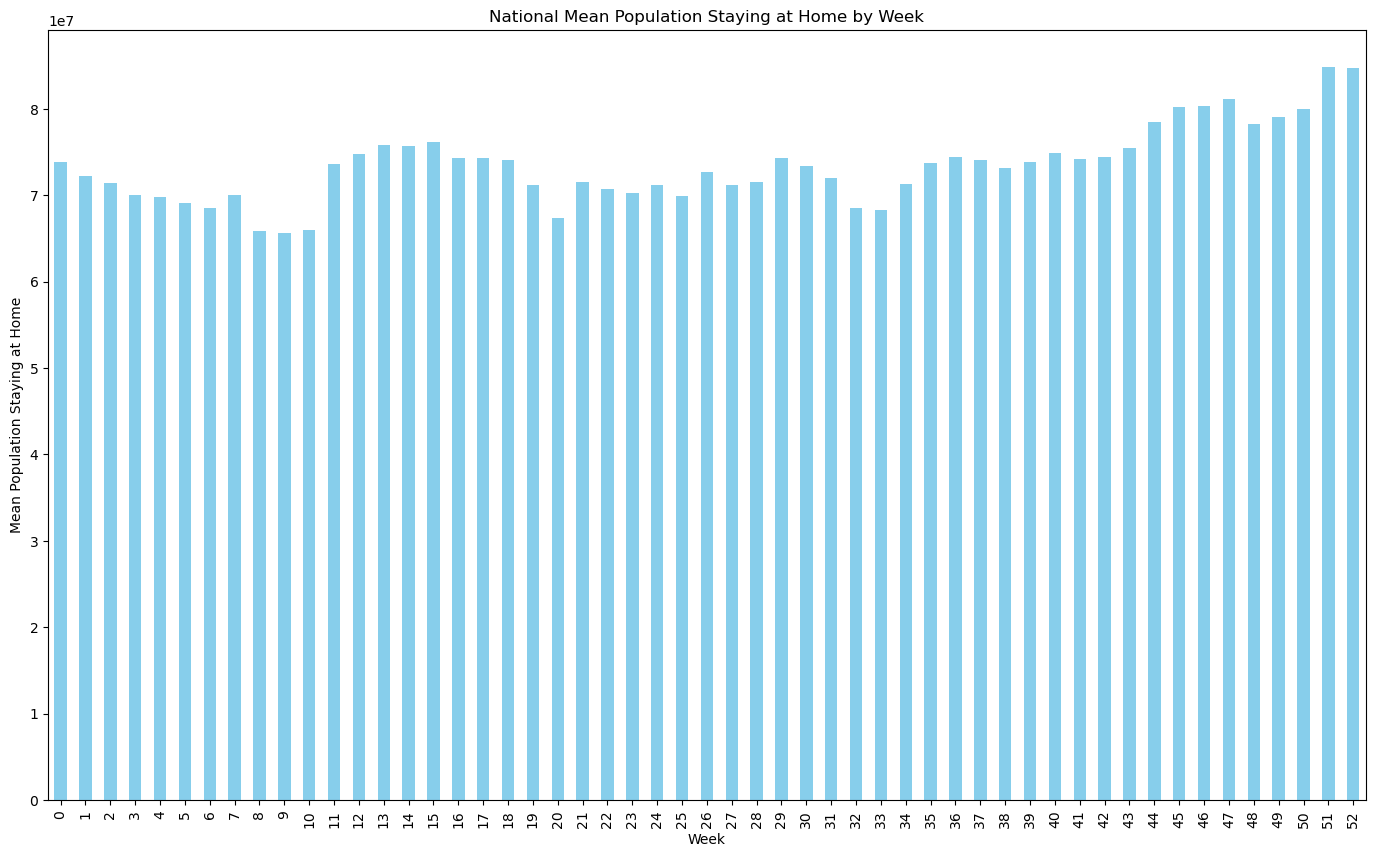

Time taken: 9.53038740158081 seconds


In [17]:
start_time = time.time()

#pandas for task a
trips = pd.read_csv("Trips_by_Distance.csv")
trips['Date'] = pd.to_datetime(trips['Date'])
#sort by date, not needed
trips = trips.sort_values(by='Date', ascending=True)

#remove unneccessary columns
trips = trips.drop(columns=["State FIPS", "State Postal Code", "County FIPS", "County Name"])
#this will leave null values, remove them as well
# trips.dropna(inplace=True)

#Look for data in the national level only
trips__national = trips[trips["Level"] == "National"]
national_mean_home_pop = trips__national.groupby(by='Week')['Population Staying at Home'].mean()


plt.figure(figsize = (17, 10))
national_mean_home_pop.plot(kind='bar', color='skyblue')


plt.title('National Mean Population Staying at Home by Week')
plt.xlabel('Week')
plt.ylabel('Mean Population Staying at Home')
plt.xticks(rotation=90)

# Show the plot
plt.show()

# Measure end time
end_time = time.time()

# Print time taken
print(f"Time taken: {end_time - start_time} seconds")